# Vineyard Vigilance: Harnessing Deep Learning for Grapevine Disease Detection

Research paper: https://github.com/rajarshi-mandal/grapevine-disease-detection/blob/main/Research%20Paper.pdf

The model training notebook for grapevine disease detection: https://www.kaggle.com/code/rm1000/grapevine-disease-detection-model-training

The model evaluation notebook for grapevine disease detection: https://www.kaggle.com/code/rm1000/grapevine-disease-detection-model-evaluation

If this notebook was helpful, please leave an upvote!

# Library Imports

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Tabular data
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # High-level data visualization
import pathlib # File paths
import os # Operating system
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Object containing data

# Grapes: A Sustainable Food Source

In [2]:
# Reading data
df = pd.read_csv('/kaggle/input/environment-impact-of-food-production/Food_Production.csv')

In [3]:
# Renaming columns for clarity and conciseness
df.rename(columns = {'Food product':'Food Product',
                     'Land use per 1000kcal (m² per 1000kcal)':'Land Use (m² per 1000 kcal)',
                     'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)':'Greenhouse Gas Emissions per 1000 kcal',
                     'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)':'Eutrophication Emissions per 1000 kcal'},
          inplace=True)

In [4]:
# Dropping missing values and sorting by land use, greenhouse gas emissions, and eutrophication emissions
land_df= df.dropna().sort_values(by= 'Land Use (m² per 1000 kcal)', ascending=False)[['Food Product','Land Use (m² per 1000 kcal)']]
gas_df= df.dropna().sort_values(by= 'Greenhouse Gas Emissions per 1000 kcal', ascending=False)[['Food Product','Greenhouse Gas Emissions per 1000 kcal']]
eutro_df= df.dropna().sort_values(by= 'Eutrophication Emissions per 1000 kcal', ascending=False)[['Food Product','Eutrophication Emissions per 1000 kcal']]

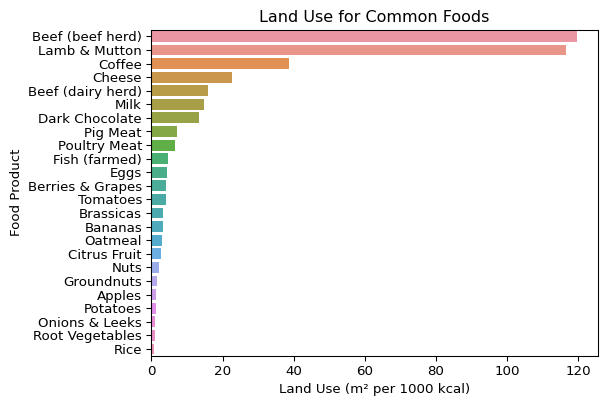

In [5]:
# Setting figsize and dpi for the plot
plt.figure(figsize=(6,4.5), dpi=96)
# Adding the title
plt.title('Land Use for Common Foods')
# Plotting the barplot
sns.barplot(data=land_df, x='Land Use (m² per 1000 kcal)', y='Food Product', orient='h')
# Displaying the plot
plt.show()

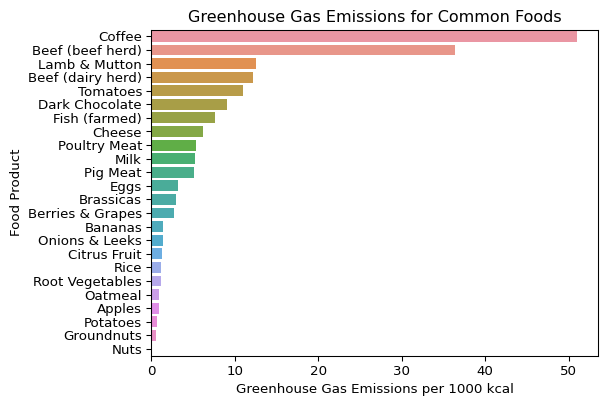

In [6]:
# Setting figsize and dpi for the plot
plt.figure(figsize=(6,4.5), dpi=96)
# Adding the title
plt.title('Greenhouse Gas Emissions for Common Foods')
# Plotting the barplot
sns.barplot(data=gas_df, x='Greenhouse Gas Emissions per 1000 kcal', y='Food Product', orient='h')
# Displaying the plot
plt.show()

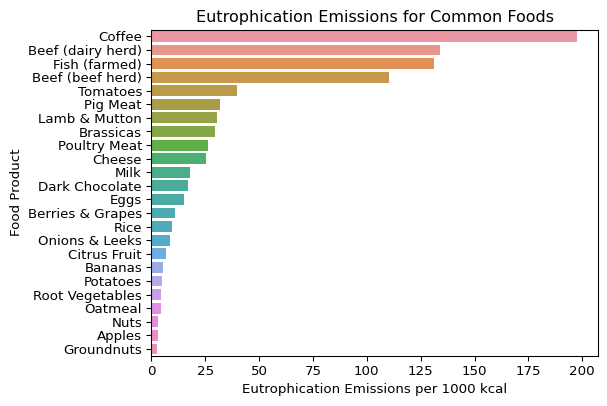

In [7]:
# Setting figsize and dpi for the plot
plt.figure(figsize=(6,4.5), dpi=96)
# Adding the title
plt.title('Eutrophication Emissions for Common Foods')
# Plotting the barplot
sns.barplot(data=eutro_df, x='Eutrophication Emissions per 1000 kcal', y='Food Product', orient='h')
# Displaying the plot
plt.show()

# Experimental Data Analysis

In [8]:
# Creating a path for the input directory
data_dir = pathlib.Path('/kaggle/input/grape-disease/grape_dataset')
# Adding 'train' and 'test' to the path
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'

In [9]:
# Adding the four diseases to the path
train_black_rot_dir = train_dir / 'Grape___Black_rot'
train_esca_dir = train_dir / 'Grape___Esca_(Black_Measles)'
train_leaf_blight_dir = train_dir / 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
train_healthy_dir = train_dir / 'Grape___healthy'

In [10]:
# Selecting all JPG files
black_rot_images = train_black_rot_dir.glob('*.JPG')
esca_images = train_esca_dir.glob('*.JPG')
leaf_blight_images = train_leaf_blight_dir.glob('*.JPG')
healthy_images = train_healthy_dir.glob('*.JPG')

In [11]:
# A list that will contain the images
train_data = []
# Adding the images to train_data
for img in black_rot_images:
    train_data.append((img,'Black Rot'))
for img in esca_images:
    train_data.append((img,'ESCA'))
for img in leaf_blight_images:
    train_data.append((img,'Leaf Blight'))
for img in healthy_images:
    train_data.append((img,'Healthy'))
# Converting the list to a dataframe
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
# Getting rid of the indices
train_data = train_data.sample(frac=1.).reset_index(drop=True)
# Getting the first 5 rows of the data
train_data.head()

,image,label
0,/kaggle/input/grape-disease/grape_dataset/trai...,Black Rot
1,/kaggle/input/grape-disease/grape_dataset/trai...,Leaf Blight
2,/kaggle/input/grape-disease/grape_dataset/trai...,Leaf Blight
3,/kaggle/input/grape-disease/grape_dataset/trai...,ESCA
4,/kaggle/input/grape-disease/grape_dataset/trai...,Leaf Blight


In [12]:
# Counting number of diseases
disease_count = train_data['label'].value_counts()
# Printing disease counts
print(disease_count, end='\n\n')
# Calculating total number of images
total_num_images = disease_count[0] + disease_count[1] + disease_count[2] + disease_count[3]
# Printing total number of images
print(f'There are a total of {total_num_images} images of Grapevine Leaves.')

ESCA           1920
Black Rot      1888
Leaf Blight    1722
Healthy        1692
Name: label, dtype: int64

There are a total of 7222 images of Grapevine Leaves.


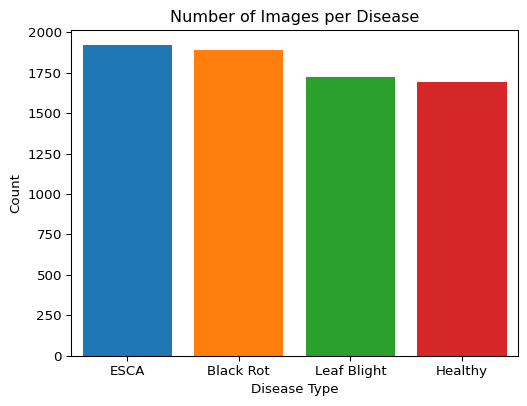

In [13]:
# Setting figsize and dpi for the plot
plt.figure(figsize=(6,4.5), dpi=96)
# Plotting the barplot
sns.barplot(x=disease_count.index, y=disease_count.values, saturation=1)
# Adding the title
plt.title('Number of Images per Disease')
# Adding the x and y labels
plt.xlabel('Disease Type')
plt.ylabel('Count')
# Displaying the plot
plt.show()

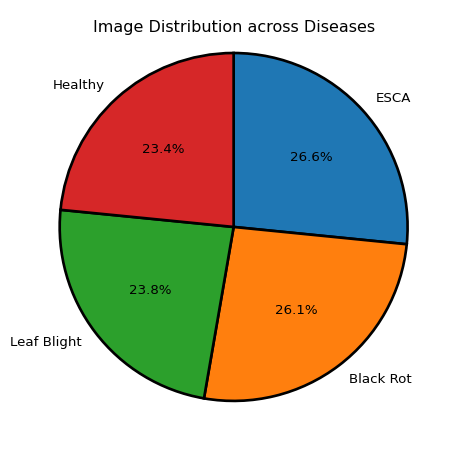

In [14]:
# Setting figsize and dpi for the plot
plt.figure(figsize=(6,6), dpi=96)
# Adding the title
plt.title('Image Distribution across Diseases', y=0.93)
# Plotting the pie chart
plt.pie(x=disease_count,
        labels=disease_count.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'edgecolor':'black','linewidth':2})
# Displaying the plot
plt.show();

In [15]:
# Initializing seed and n_images
seed = 1234
n_images = 8
# Getting 8 images for each disease
black_rot_samples = (train_data[train_data['label']=='Black Rot']['image'].iloc[seed:seed+n_images]).tolist()
esca_samples = (train_data[train_data['label']=='ESCA']['image'].iloc[seed:seed+n_images]).tolist()
leaf_blight_samples = (train_data[train_data['label']=='Leaf Blight']['image'].iloc[seed:seed+n_images]).tolist()
healthy_samples = (train_data[train_data['label']=='Healthy']['image'].iloc[seed:seed+n_images]).tolist()
# Concatenating the samples
samples = black_rot_samples + esca_samples + leaf_blight_samples + healthy_samples

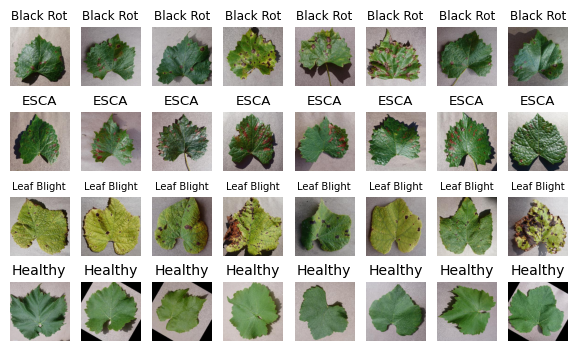

In [16]:
# Initializing subplots
fig, ax = plt.subplots(nrows=4,ncols=n_images,figsize=(7.5,4.5), dpi=96)
# Iterating over total number of images
for i in range(n_images*4):
    # Getting the image's pixel values
    img = plt.imread(samples[i])
    # Plotting the image
    ax[i//n_images, i%n_images].imshow(img, cmap='gray')
    # Adding a title
    if i<n_images:
        ax[i//n_images, i%n_images].set_title("Black Rot", fontsize=9)
    elif i<n_images*2:
        ax[i//n_images, i%n_images].set_title("ESCA", fontsize=10)
    elif i<n_images*3:
        ax[i//n_images, i%n_images].set_title("Leaf Blight", fontsize=7.5)
    else:
        ax[i//n_images, i%n_images].set_title("Healthy", fontsize=10.5)
    # Getting rid of the axes
    ax[i//n_images, i%n_images].axis('off')
    # Setting the aspect ratio to 1
    ax[i//n_images, i%n_images].set_aspect(aspect=1)
# Displaying the plot
plt.show()

# Data Augmentation

In [17]:
augment_data = False
# Dividing pixel values by 255
def normalize(img):
    return img/255
# Creating the augmented directory
os.makedirs('/kaggle/working/augmented')

In [18]:
# Creating separate directories for each disease
os.makedirs('/kaggle/working/augmented/Black Rot')
os.makedirs('/kaggle/working/augmented/ESCA')
os.makedirs('/kaggle/working/augmented/Leaf Blight')
os.makedirs('/kaggle/working/augmented/Healthy')

In [19]:
# Instantiating data generators that will augment the data
black_rot_datagen = ImageDataGenerator(preprocessing_function=normalize,
                                       zoom_range=0.33,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       rotation_range=360,
                                       brightness_range=[0.5,1.5],
                                       shear_range=7.5)

esca_datagen = ImageDataGenerator(preprocessing_function=normalize,
                                  zoom_range=0.33,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  rotation_range=360,
                                  brightness_range=[0.5,1.5],
                                  shear_range=7.5)

leaf_blight_datagen = ImageDataGenerator(preprocessing_function=normalize,
                                         zoom_range=0.33,
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         rotation_range=360,
                                         brightness_range=[0.5,1.5],
                                         shear_range=7.5)

healthy_datagen = ImageDataGenerator(preprocessing_function=normalize,
                                     zoom_range=0.33,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=360,
                                     brightness_range=[0.5,1.5],
                                     shear_range=7.5)

In [20]:
# Having the data generators read in the data
black_rot_datagen = black_rot_datagen.flow_from_directory('/kaggle/input/grape-disease-dataset-original/Original Data/train',
                                                          target_size = (224,224),
                                                          batch_size = 256,
                                                          class_mode = 'sparse',
                                                          classes = ['Black Rot'],
                                                          shuffle = True,
                                                          save_to_dir = '/kaggle/working/augmented/Black Rot')

esca_datagen = esca_datagen.flow_from_directory('/kaggle/input/grape-disease-dataset-original/Original Data/train',
                                                target_size = (224,224),
                                                batch_size = 256,
                                                class_mode = 'sparse',
                                                classes = ['ESCA'],
                                                shuffle = True,
                                                save_to_dir = '/kaggle/working/augmented/ESCA')

leaf_blight_datagen = leaf_blight_datagen.flow_from_directory('/kaggle/input/grape-disease-dataset-original/Original Data/train',
                                                              target_size = (224,224),
                                                              batch_size = 256,
                                                              class_mode = 'sparse',
                                                              classes = ['Leaf Blight'],
                                                              shuffle = True,
                                                              save_to_dir = '/kaggle/working/augmented/Leaf Blight')

healthy_datagen = healthy_datagen.flow_from_directory('/kaggle/input/grape-disease-dataset-original/Original Data/train',
                                                      target_size = (224,224),
                                                      batch_size = 256,
                                                      class_mode = 'sparse',
                                                      classes = ['Healthy'],
                                                      shuffle = True,
                                                      save_to_dir = '/kaggle/working/augmented/Healthy')

Found 1888 images belonging to 1 classes.
Found 1920 images belonging to 1 classes.
Found 1722 images belonging to 1 classes.
Found 1692 images belonging to 1 classes.


In [21]:
# Getting sample augmented images
augmented_black_rot_samples = black_rot_datagen[0][0]
augmented_esca_samples = esca_datagen[0][0]
augmented_leaf_blight_samples = leaf_blight_datagen[0][0]
augmented_healthy_samples = healthy_datagen[0][0]

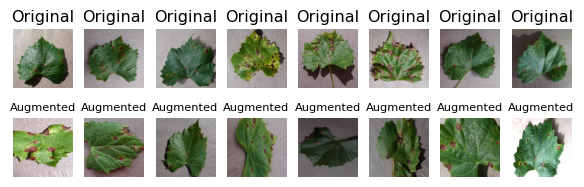

In [22]:
# Initializing subplots 
fig, ax = plt.subplots(nrows=2,ncols=n_images,figsize=(7.5,2.25), dpi=96)
# Iterating over total number of images
for i in range(16):
    if i < n_images:
        # Getting the image's pixel values
        img = plt.imread(samples[i-32])
        # Plotting the image
        ax[i//n_images, i%n_images].imshow(img, cmap='gray')
        # Adding the title
        ax[i//n_images, i%n_images].set_title("Original", fontsize=12)
    else:
        # Getting the image's pixel values
        img = augmented_black_rot_samples[i]
        # Plotting the image
        ax[i//n_images, i%n_images].imshow(img, cmap='gray')
        # Adding the title
        ax[i//n_images, i%n_images].set_title("Augmented", fontsize=8.5)
    # Getting rid of the axes
    ax[i//n_images, i%n_images].axis('off')
    # Setting the aspect ratio to 1
    ax[i//n_images, i%n_images].set_aspect(aspect=1)
# Displaying the plot
plt.show()

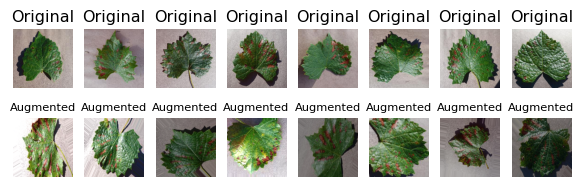

In [23]:
# Initializing subplots 
fig, ax = plt.subplots(nrows=2,ncols=n_images,figsize=(7.5,2.25), dpi=96)
# Iterating over total number of images
for i in range(16):
    if i < n_images:
        # Getting the image's pixel values
        img = plt.imread(samples[i-24])
        # Plotting the image
        ax[i//n_images, i%n_images].imshow(img, cmap='gray')
        # Adding the title
        ax[i//n_images, i%n_images].set_title("Original", fontsize=12)
    else:
        # Getting the image's pixel values
        img = augmented_esca_samples[i]
        # Plotting the image
        ax[i//n_images, i%n_images].imshow(img, cmap='gray')
        # Adding the title
        ax[i//n_images, i%n_images].set_title("Augmented", fontsize=8.5)
    # Getting rid of the axes
    ax[i//n_images, i%n_images].axis('off')
    # Setting the aspect ratio to 1
    ax[i//n_images, i%n_images].set_aspect(aspect=1)
# Displaying the plot
plt.show()

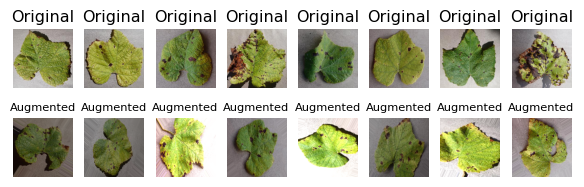

In [24]:
# Initializing subplots 
fig, ax = plt.subplots(nrows=2,ncols=n_images,figsize=(7.5,2.25), dpi=96)
# Iterating over total number of images
for i in range(16):
    if i < n_images:
        # Getting the image's pixel values
        img = plt.imread(samples[i-16])
        # Plotting the image
        ax[i//n_images, i%n_images].imshow(img, cmap='gray')
        # Adding the title
        ax[i//n_images, i%n_images].set_title("Original", fontsize=12)
    else:
        # Getting the image's pixel values
        img = augmented_leaf_blight_samples[i]
        # Plotting the image
        ax[i//n_images, i%n_images].imshow(img, cmap='gray')
        # Adding the title
        ax[i//n_images, i%n_images].set_title("Augmented", fontsize=8.5)
    # Getting rid of the axes
    ax[i//n_images, i%n_images].axis('off')
    # Setting the aspect ratio to 1
    ax[i//n_images, i%n_images].set_aspect(aspect=1)
# Displaying the plot
plt.show()

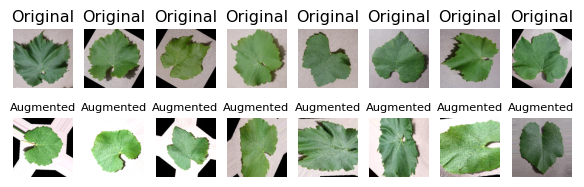

In [25]:
# Initializing subplots 
fig, ax = plt.subplots(nrows=2,ncols=n_images,figsize=(7.5,2.25), dpi=96)
# Iterating over total number of images
for i in range(16):
    if i < n_images:
        # Getting the image's pixel values
        img = plt.imread(samples[i-8])
        # Plotting the image
        ax[i//n_images, i%n_images].imshow(img, cmap='gray')
        # Adding the title
        ax[i//n_images, i%n_images].set_title("Original", fontsize=12)
    else:
        # Getting the image's pixel values
        img = augmented_healthy_samples[i]
        # Plotting the image
        ax[i//n_images, i%n_images].imshow(img, cmap='gray')
        # Adding the title
        ax[i//n_images, i%n_images].set_title("Augmented", fontsize=8.5)
    # Getting rid of the axes
    ax[i//n_images, i%n_images].axis('off')
    # Setting the aspect ratio to 1
    ax[i//n_images, i%n_images].set_aspect(aspect=1)
# Displaying the plot
plt.show()

In [26]:
# Augmenting data
if augment_data == True:
    for j in range(2):
        for i in range(24):
            black_rot_datagen[0][0][i]
        for i in range(24):
            ESCA_datagen[0][0][i]
        for i in range(24):
            leaf_blight_datagen[0][0][i]
        for i in range(24):
            healthy_datagen[0][0][i]